# Actividad Evaluación de _clustering_

Link para crear el repositorio: https://classroom.github.com/a/g7futGks


# Introducción


En esta actividad vamos a probar diferentes índices vistos en clases para  evaluar _clustering_ en un dataset de una forma más estructurada.

Para esto, la actividad consiste en 3 partes:
1. Experimentar con índices internos para encontrar el 'mejor' _clustering_ posible.
2. Visualización de _clustering_ con _scatterplots_.
3. Experimentar con índices externos para evaluar la calidad del _clustering_.

Además, esta actividad tiene como objetivo fomentar el uso de google y documentación de scikit-learn para estudiar como utilizar las diversas funciones y métodos. Algunas páginas de utilidad para esta actividad son:

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
* https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
* https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure


In [1]:
# Importar librerías necesarias. Puede agregar otras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.cluster import DBSCAN, KMeans

# índices/métricas
from sklearn.metrics import calinski_harabasz_score, silhouette_score, homogeneity_score, completeness_score


### Base de datos

La base de datos a utilizar corresponde a mediciones de la velocidad del viento y la temperatura en diferentes partes de diversas ciudad de zonas geográficas muy distintas (así que se espera que los datos entre una ciudad y otra sean diferentes). Los datos ya fueron normalizados, por lo tanto están listo para cargar y usar.

In [2]:
DATA_URL = "https://raw.githubusercontent.com/IIC2433/Syllabus-2020-2/master/Actividades/AC07/ac07.csv"
data = pd.read_csv(DATA_URL)
data.head()

,velocidad_viento,temperatura
0,0.027233,0.025921
1,0.018833,0.021896
2,0.019561,0.019922
3,0.016628,0.021924
4,0.021585,0.021502


# Parte 1 - índices internos


## Experimentación 

En esta parte, deberás experimentar con diferentes índices y modelos, para ello, tendrás que definir 6 modelos distinto de _clustering_:

1. Kmeans con 2 clusters
2. Kmeans con 6 clusters
3. Kmeans con X clusters, donde X es un número definido por ti que debe ser distinto a 2 y 6.
4. DBSCAN con 3 vecinos.
5. DBSCAN con 10 vecinos.
6. DBSCAN con X vecinos, donde X es un número definido por ti que debe ser distinto a 3 y 10.


Para cada uno de estos modelos, deberás calcular los siguientes índices

1. _The Calinski-Harabasz index_. Es la relación (_ratio_) de la suma entre la **dispersión entre clusters** (que tan separados están los clusters) y la **dispersión dentro de los clusters** (que tan separados están los datos dentro de un clusters). Se puede ver de la siguiente forma, donde __BDC__ es _between cluster dispersion_ (BSS visto en clases) y **WCD**, _within cluster dispersion_ (WSS o SSE visto en clases). :
$$ s = \dfrac{BCD}{k-1} \div \dfrac{WCD}{n-k}$$
De acá podemos ver que valores mayores en esta métrica tienen asociado **gran distancia entre clusters** (clusters más distantes), pero **distancias dentro del cluster más pequeñas** (cada cluster es más denso) (esto es bueno!!).
    
    Se puede apreciar que este índice es una mezcla entre los índices vistos en clases de Cohesión y Separación.


2. _Silhouette Coefficient_: Esta métrica se calcula a partir de dos coeficientes, ```a``` que cuantifica la **cercanía de un punto a su cluster** y ```b``` que mide la **distancia del punto al próximo cluster más cercano**. A partir de esto se calcula el coeficiente para un punto como:
$$s = \dfrac{b - a}{\max{(a, b)}}$$

    Luego, _Silhouette Coefficient_ corresponde al promedio de calcular $s$ para cada punto. El valor de este cálculo estará siempre acotado en el rango [-1, 1]. Valores altos en esta métrica (cercanos a 1), significarán que la **distancia interna en el clusters es pequeña** con relación a la distancia al siguiente cluster (lo cual es muy bueno!).


In [17]:
# Código para hacer el clustering. Puede agregar las celdas que encuentre necesarias

## 1.
kmeans_1 = KMeans(n_clusters=2)
kmeans_2 = KMeans(n_clusters=6)
kmeans_3 = KMeans(n_clusters=3)
dbscan_1 = DBSCAN(eps=0.001, min_samples=4) # 3 vecinos, pero min_samples incluye al punto original
dbscan_2 = DBSCAN(eps=0.001, min_samples=11)
dbscan_3 = DBSCAN(eps=0.001, min_samples=7)


kmeans_1.fit(data)
kmeans_2.fit(data)
kmeans_3.fit(data)
dbscan_1.fit(data)
dbscan_2.fit(data)
dbscan_3.fit(data)

DBSCAN(algorithm='auto', eps=0.001, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [19]:
print('Valor en The Calinski-Harabasz index de modelo 1:', calinski_harabasz_score(data, kmeans_1.labels_))
print('Valor en The Calinski-Harabasz index de modelo 2:', calinski_harabasz_score(data, kmeans_2.labels_))
print('Valor en The Calinski-Harabasz index de modelo 3:', calinski_harabasz_score(data, kmeans_3.labels_))
print('Valor en The Calinski-Harabasz index de modelo 4:', calinski_harabasz_score(data, dbscan_1.labels_))
print('Valor en The Calinski-Harabasz index de modelo 5:', calinski_harabasz_score(data, dbscan_2.labels_))
print('Valor en The Calinski-Harabasz index de modelo 6:', calinski_harabasz_score(data, dbscan_3.labels_))
print('---------------------')
print('Valor en Silhouette Coefficient de modelo 1:', silhouette_score(data, kmeans_1.labels_))
print('Valor en Silhouette Coefficient de modelo 2:', silhouette_score(data, kmeans_2.labels_))
print('Valor en Silhouette Coefficient de modelo 3:', silhouette_score(data, kmeans_3.labels_))
print('Valor en Silhouette Coefficient de modelo 4:', silhouette_score(data, dbscan_1.labels_))
print('Valor en Silhouette Coefficient de modelo 5:', silhouette_score(data, dbscan_2.labels_))
print('Valor en Silhouette Coefficient de modelo 6:', silhouette_score(data, dbscan_3.labels_))

Valor en The Calinski-Harabasz index de modelo 1: 5612.919945003723
Valor en The Calinski-Harabasz index de modelo 2: 5971.891476523029
Valor en The Calinski-Harabasz index de modelo 3: 4769.960764264155
Valor en The Calinski-Harabasz index de modelo 4: 1.1080010195968275
Valor en The Calinski-Harabasz index de modelo 5: 2694.5010286473553
Valor en The Calinski-Harabasz index de modelo 6: 2704.499208774454
---------------------
Valor en Silhouette Coefficient de modelo 1: 0.6388357102231721
Valor en Silhouette Coefficient de modelo 2: 0.5045330252343384
Valor en Silhouette Coefficient de modelo 3: 0.5534901739078526
Valor en Silhouette Coefficient de modelo 4: 0.08939005073391423
Valor en Silhouette Coefficient de modelo 5: 0.5182994634447318
Valor en Silhouette Coefficient de modelo 6: 0.5196803980004793


#### Preguntas 

Contesta las siguientes preguntas:

1. ¿Cuál modelo tiene el máximo valor en _The Calinski-Harabasz index_? 

    El modelo de máximo valor es el modelo 2 (K-means usando 6 clusters).
2. ¿Cuál modelo tiene el mínimo valor en _The Calinski-Harabasz index_? 

    El modelo de mínimo valor es el modelo 4 (DBSCAN con 3 vecinos).

3. ¿Cuál modelo tiene el máximo valor en _Silhouette Coefficient_? 

    El modelo de máximo valor es el modelo 1 (K-means usando 2 clusters).

4. ¿Cuál modelo tiene el mínimo valor en _Silhouette Coefficient_? 

    El modelo de mínimo valor es el modelo 4 (DBSCAN con 3 vecinos).


# Parte 2 - Visualización

Selecciona 2 modelos distintos de los identificados en la sección de **Preguntas** y realice un _scatterplot_ donde los ejes X, Y sean los atributos `velocidad_viento` y `temperatura`, mientras que el color sea el _cluster_ al que pertenece dicho punto.

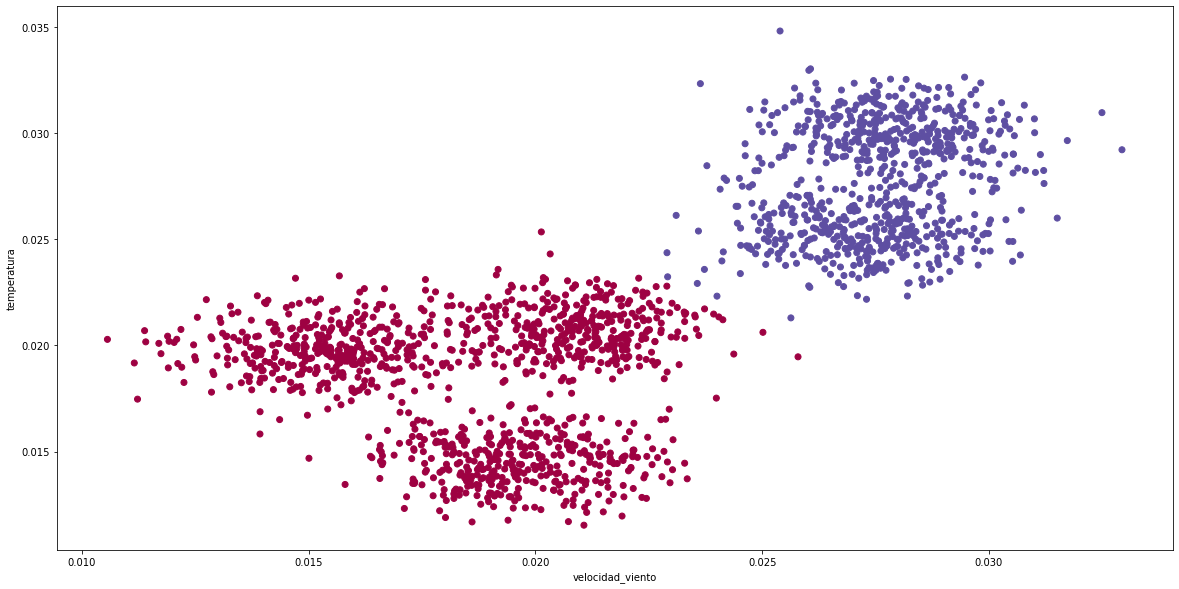

In [20]:
## Código para hacer la visualización. Puede agregar las celdas que encuentre necesarias
plt.figure(figsize=(20, 10))
plt.scatter(data['velocidad_viento'], data['temperatura'], c=kmeans_1.labels_, cmap='Spectral')
plt.xlabel('velocidad_viento')
plt.ylabel('temperatura')

plt.show()

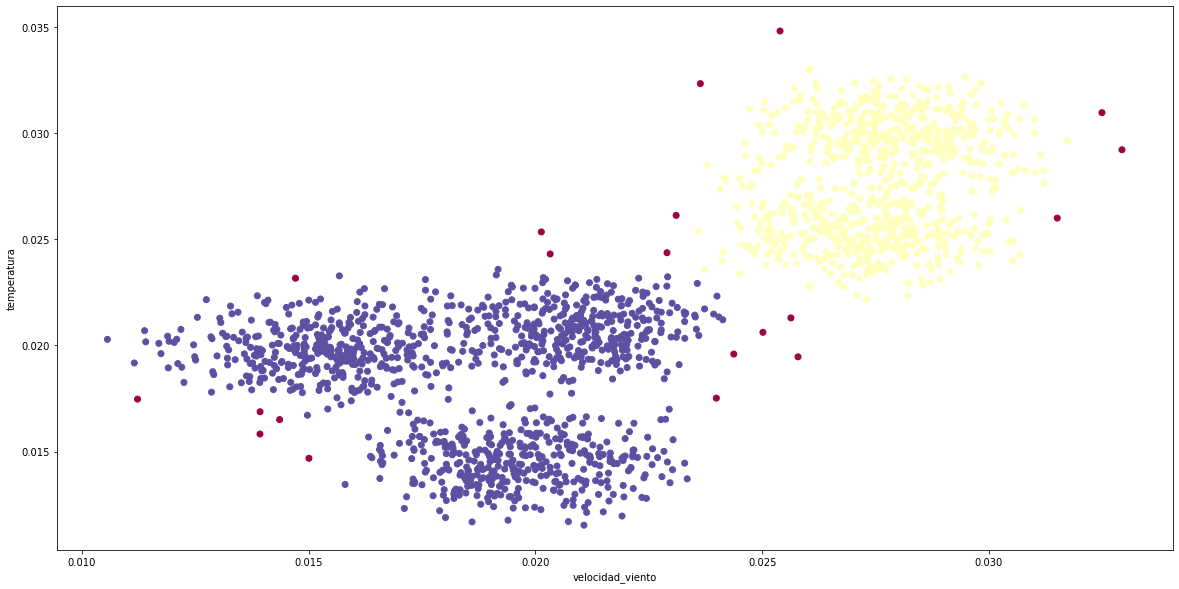

In [22]:
plt.figure(figsize=(20, 10))
plt.scatter(data['velocidad_viento'], data['temperatura'], c=dbscan_3.labels_, cmap='Spectral')
plt.xlabel('velocidad_viento')
plt.ylabel('temperatura')

plt.show()

Finalmente **indica** cual de los 2 modelos agrupa mejor los datos en sus diferentes grupos y **comenta** como se relaciona la visualización lograda con los 2 índices calculadas.

El modelo KMeans logra agrupar de mejor forma los datos.

Parece existir una relación que agrupa bajas velocidades de viento con bajas temperaturas, y altas velocidades con altas temperaturas. En total se observan 2 grupos claros.

# Parte 3 - índices externos

El siguiente dataset tiene **exactamente los mismos datos** que el usado en la parte 1 y 3, **pero** ahora incluye una etiqueta de la clase del dato, en este caso, un número distinto por ciudad en donde se registraron los datos. Con este dataset vamos a validar como funcionó el _clustering_.

In [23]:
DATA_URL = "https://raw.githubusercontent.com/IIC2433/Syllabus-2020-2/master/Actividades/AC07/ac07_with_label.csv"
data = pd.read_csv(DATA_URL)
data.head()

,velocidad_viento,temperatura,label
0,0.027233,0.025921,4
1,0.018833,0.021896,3
2,0.019561,0.019922,3
3,0.016628,0.021924,1
4,0.021585,0.021502,3


Realiza un _scatterplot_ donde los ejes X, Y sean los atributos `velocidad_viento` y `temperatura`, mientras que el color sea la clase de dicho punto (`label`).

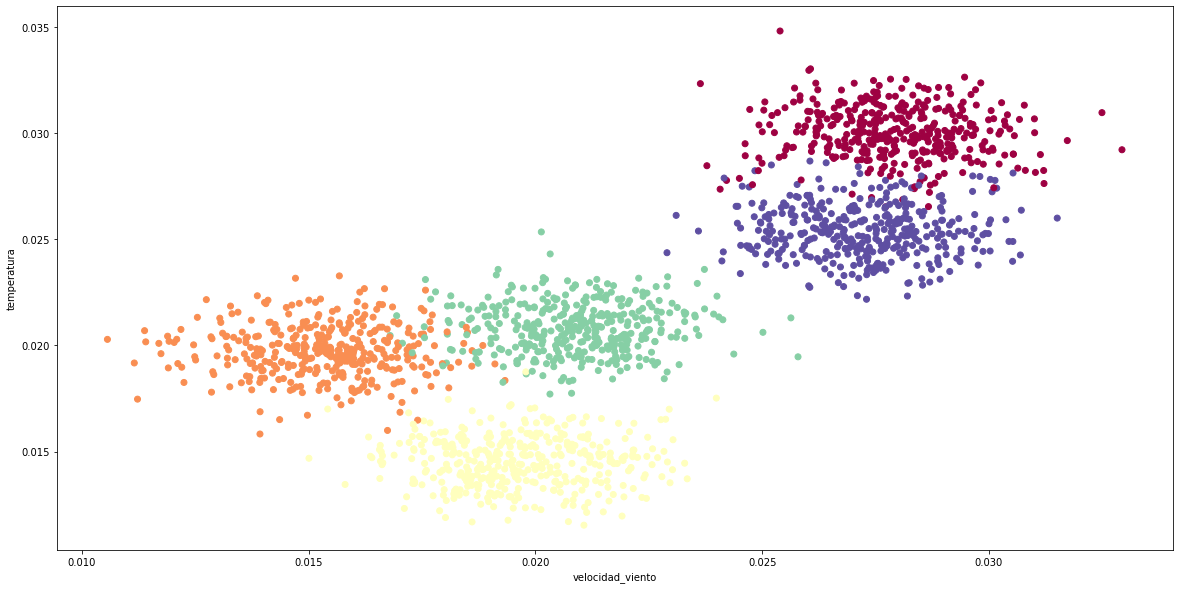

In [25]:
# Código para la visualización.
plt.figure(figsize=(20, 10))
plt.scatter(data['velocidad_viento'], data['temperatura'], c=data["label"], cmap='Spectral')
plt.xlabel('velocidad_viento')
plt.ylabel('temperatura')

plt.show()

Ahora, para los 2 modelos utilizados en la sección de **visualización**, deberás calcular los siguientes índices:

1. _Homogeneity_: Se puede decir que un algoritmo de _clustering_ es "perfectamente homogéneo" cuando cada uno de los _clusters_ tienen datos que pertenecen a una sola _clase_, así, este **índice cuantifica la tendencia de los _clusters_ a ser homogéneos** (de acá que valores más altos indiquen _clusters_ más homogéneos). Este índice tambien es conocida como **Pureza**.

2. _Completeness_: Por otro lado, un algoritmo de _clustering_ será "completo" cuando todos los datos pertenecientes a una misma clase son asignados al mismo _cluster_, así esta **índice cuantifica la tendencia de los _clusters_ a ser completos** (por lo tanto, valores más altos indica mayor completitud). Este índice está muy relacionada con la vista en clases de **Entropia** porque se puede ver como $Completeness=1-Entropia$

Finalmente, el rango de ambos índices está acotado en el intervalo [0, 1].

In [ ]:
## Código para calcular los índices. Puede agregar las celdas que encuentre necesarias

Finalmente, **indica** cual de los 2 modelos tiene mayor _homogeneity_ y _completeness_ y **comenta** como se relaciona la visualización de sus clases originales (lo que hiciste en la parte 3), con la visualización de los cluster (la que hiciste en la parte 3) y los 2 índices recien calculadas (_homogeneity_ y _completeness_).


**Comentario pendiente**